In [1]:
# download dataset from kaggle, makesure to have kaggle.json in ~/.kaggle
! kaggle datasets download uciml/indian-liver-patient-records --unzip --w

Dataset URL: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records
License(s): CC0-1.0
  0% 0.00/7.68k [00:00<?, ?B/s]
100% 7.68k/7.68k [00:00<00:00, 18.4MB/s]


In [2]:
# basic imports for data analysis and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset into a pandas dataframe
df = pd.read_csv('indian_liver_patient.csv')

In [4]:
# look at the dataset
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# see for null valls and datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
#drop all rows with null values
df.dropna(inplace=True)

In [7]:
# look at final shape of the dataset with no null vals
df.shape

(579, 11)

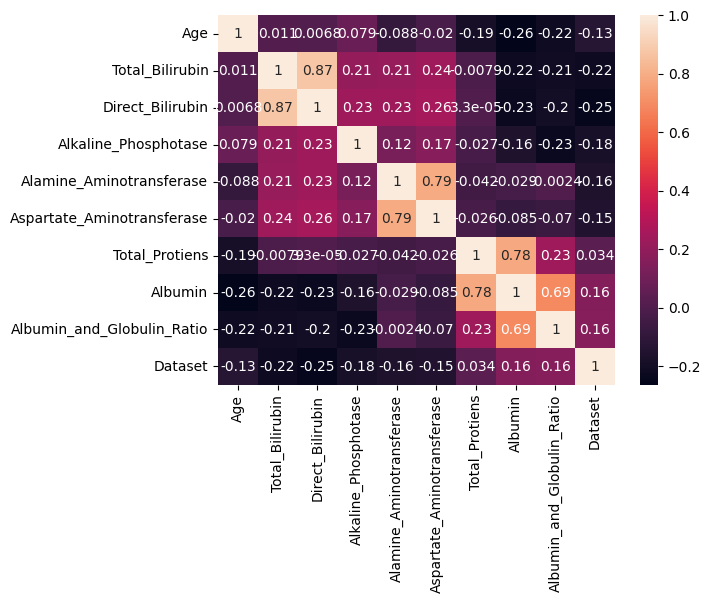

In [8]:
# look at the correlation matrix
plt.plot(figsize=(40,40))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [9]:
# convert gender to binary, going to try LabelEncoder by sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [10]:
# check how data looks like now
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
# normalize age
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])

In [12]:
# look at new normalized age
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,0.674419,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,0.674419,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,0.627907,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,0.790698,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
# check if other data needs to be normalized
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.474214,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,0.188625,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,0.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,0.337209,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,0.476744,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,0.627907,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,1.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [14]:
# lots of normalization needed lets do it one by one
df["Total_Bilirubin"] = scaler.fit_transform(df[["Total_Bilirubin"]])
df["Direct_Bilirubin"] = scaler.fit_transform(df[["Direct_Bilirubin"]])
df["Alkaline_Phosphotase"] = scaler.fit_transform(df[["Alkaline_Phosphotase"]])
df["Alamine_Aminotransferase"] = scaler.fit_transform(df[["Alamine_Aminotransferase"]])
df["Aspartate_Aminotransferase"] = scaler.fit_transform(df[["Aspartate_Aminotransferase"]])
df["Total_Protiens"] = scaler.fit_transform(df[["Total_Protiens"]])
df["Albumin"] = scaler.fit_transform(df[["Albumin"]])
df["Albumin_and_Globulin_Ratio"] = scaler.fit_transform(df[["Albumin_and_Globulin_Ratio"]])
 # I personally think 0 and 1 are better than 1 and 2
df["Dataset"] = df["Dataset"].map({2:1, 1:0})

In [15]:
# check new data
df.head(20)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0
5,0.488372,1,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,0
6,0.255814,0,0.006702,0.005102,0.044455,0.003015,0.000407,0.623188,0.565217,0.280,0
7,0.290698,0,0.006702,0.010204,0.067904,0.002010,0.000203,0.579710,0.586957,0.320,0
8,0.151163,1,0.006702,0.010204,0.067904,0.006030,0.001830,0.681159,0.695652,0.360,1
9,0.593023,1,0.004021,0.005102,0.110894,0.021608,0.009758,0.594203,0.543478,0.280,0


In [16]:
# data preprocessing done, lets split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop("Dataset", axis=1)
y = df["Dataset"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# lets try DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# more evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.79      0.72        73
           1       0.48      0.33      0.39        43

    accuracy                           0.62       116
   macro avg       0.57      0.56      0.56       116
weighted avg       0.60      0.62      0.60       116

[[58 15]
 [29 14]]
0.6206896551724138


In [18]:
# yes. i know that model looks bad.. lets try tuning hyperparameters
from sklearn.model_selection import GridSearchCV
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
}
grid = GridSearchCV(dt, param_grid=params, cv=5, n_jobs=-1, scoring="accuracy")
grid.fit(X_train, y_train)
grid.best_params_


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

In [19]:
X_train.head()
y_train.head()

75     1
544    0
118    0
323    1
280    0
Name: Dataset, dtype: int64

In [20]:
# lets try the model again with the best params
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=15, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        73
           1       0.54      0.51      0.52        43

    accuracy                           0.66       116
   macro avg       0.63      0.63      0.63       116
weighted avg       0.65      0.66      0.65       116



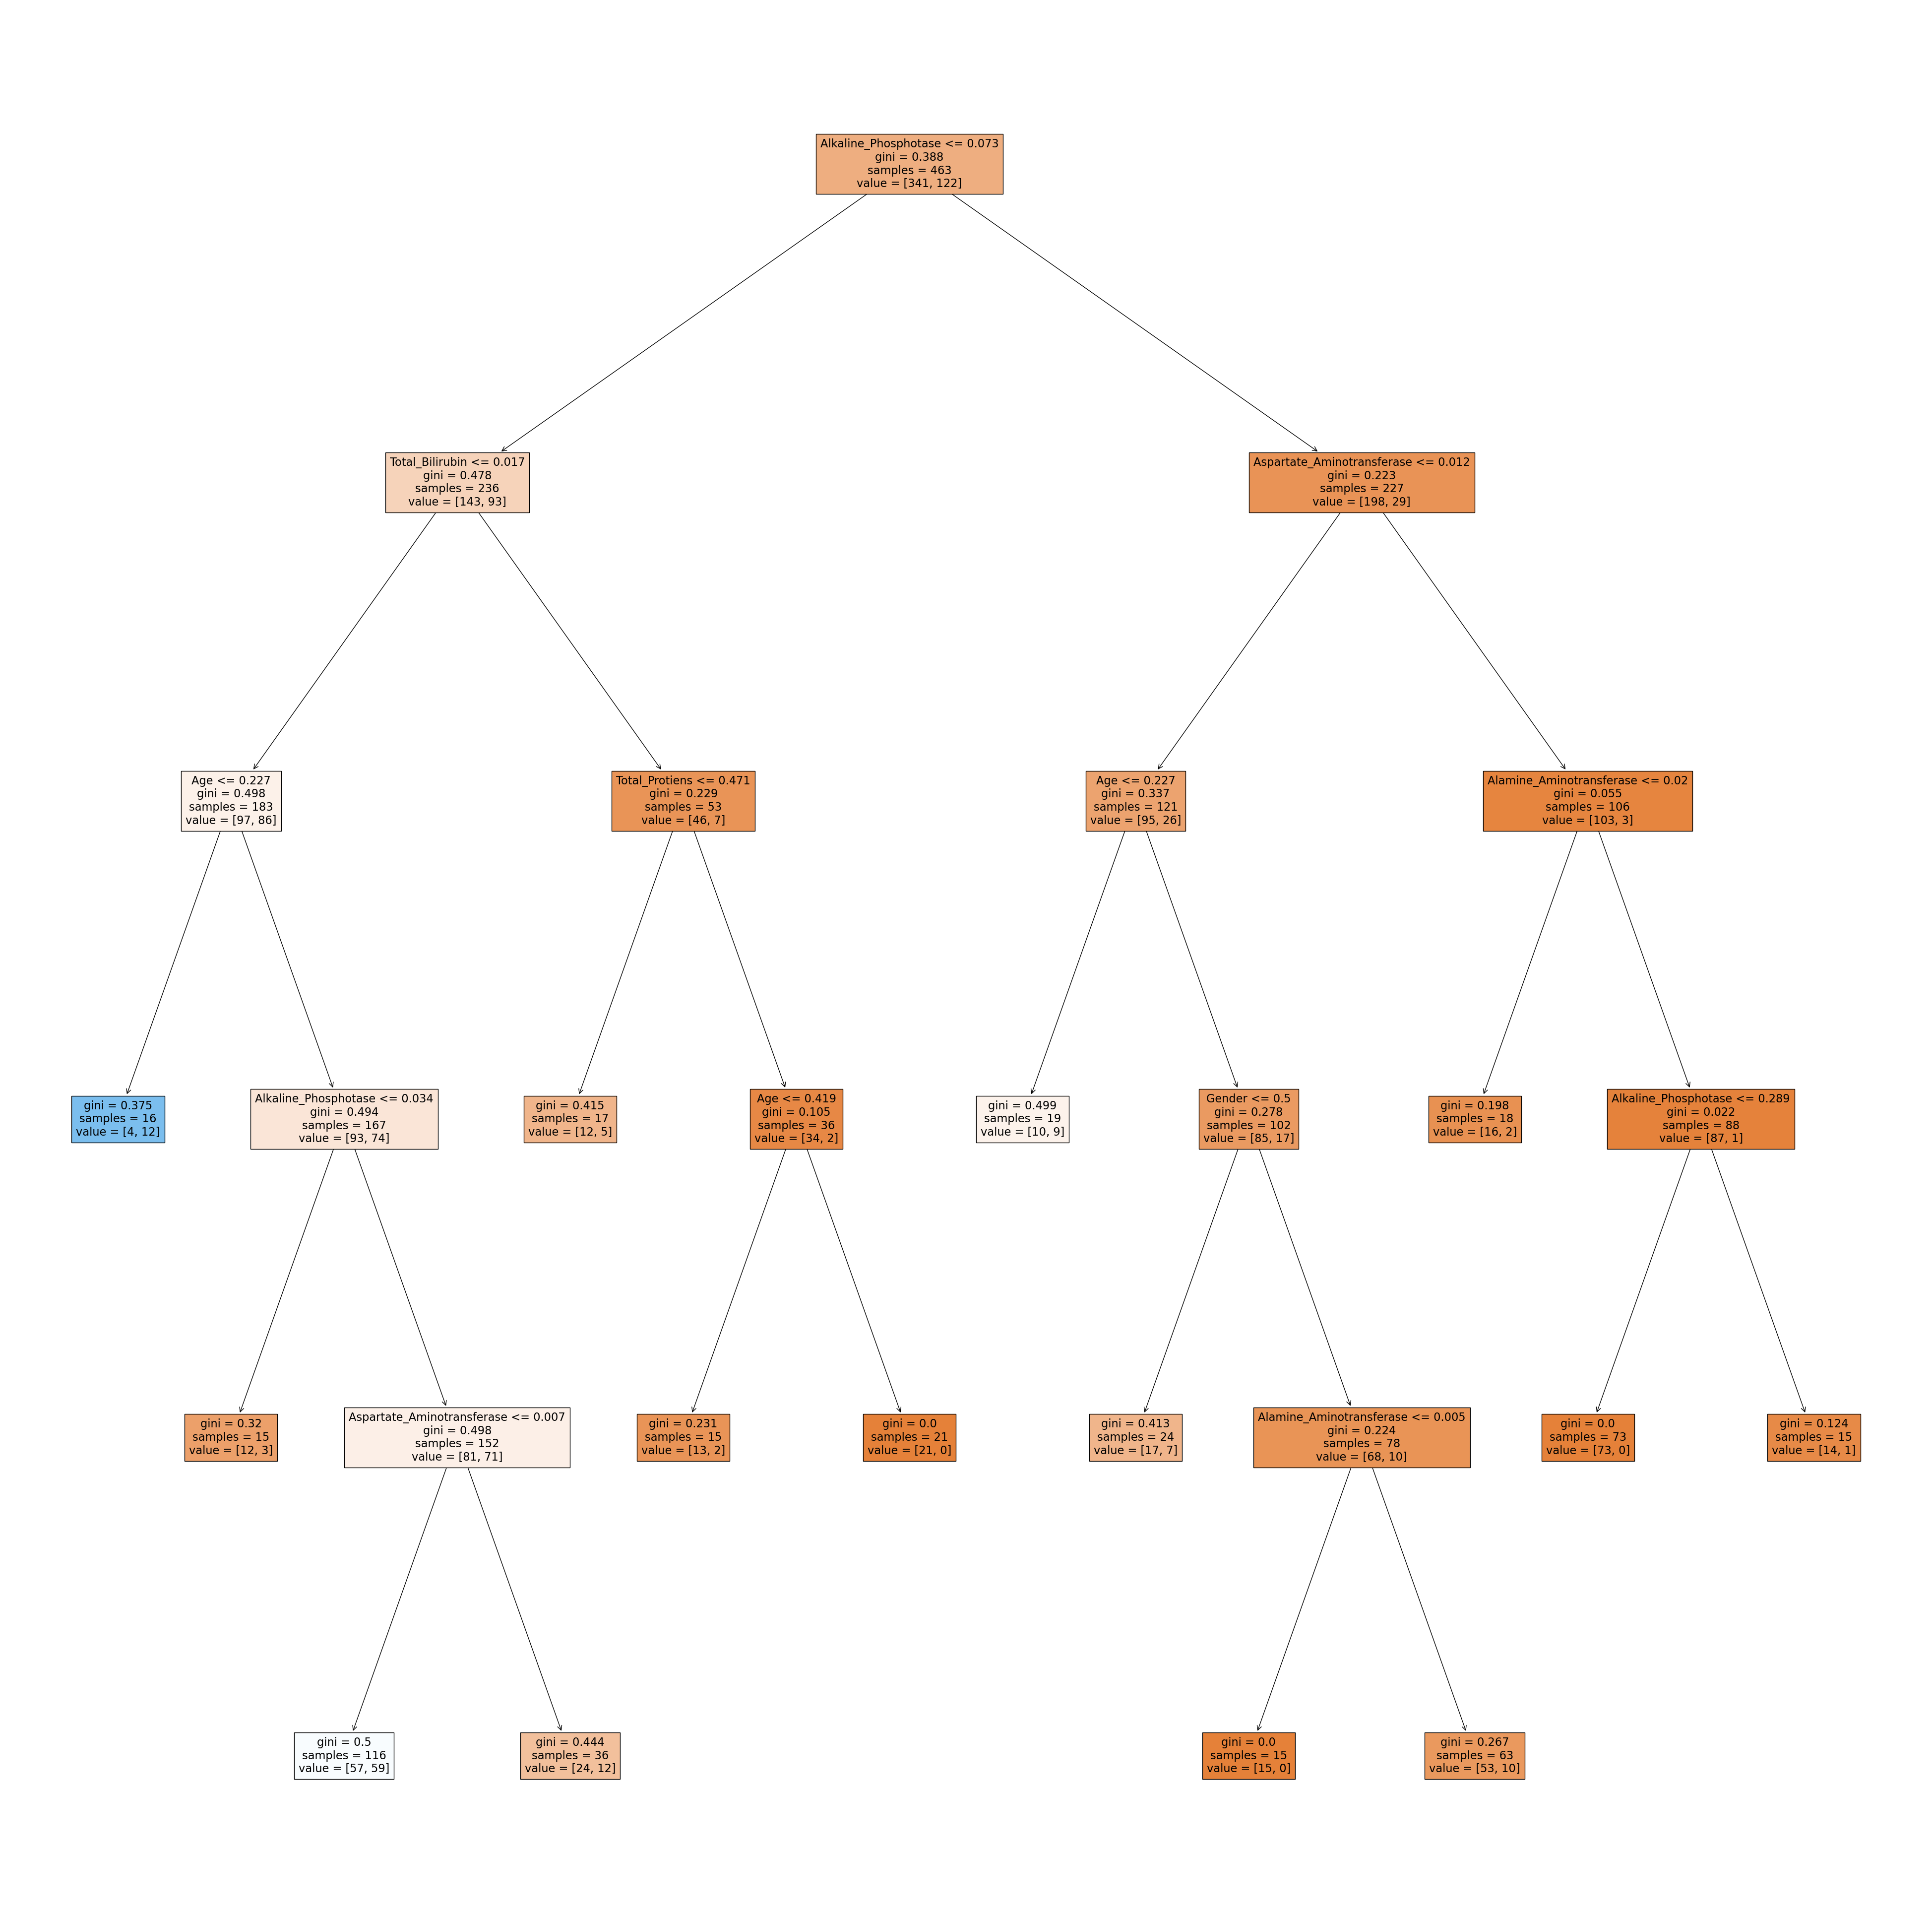

In [21]:
# ok thats still bad.. lets try aseeing how the teh tree looks like
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

<Axes: >

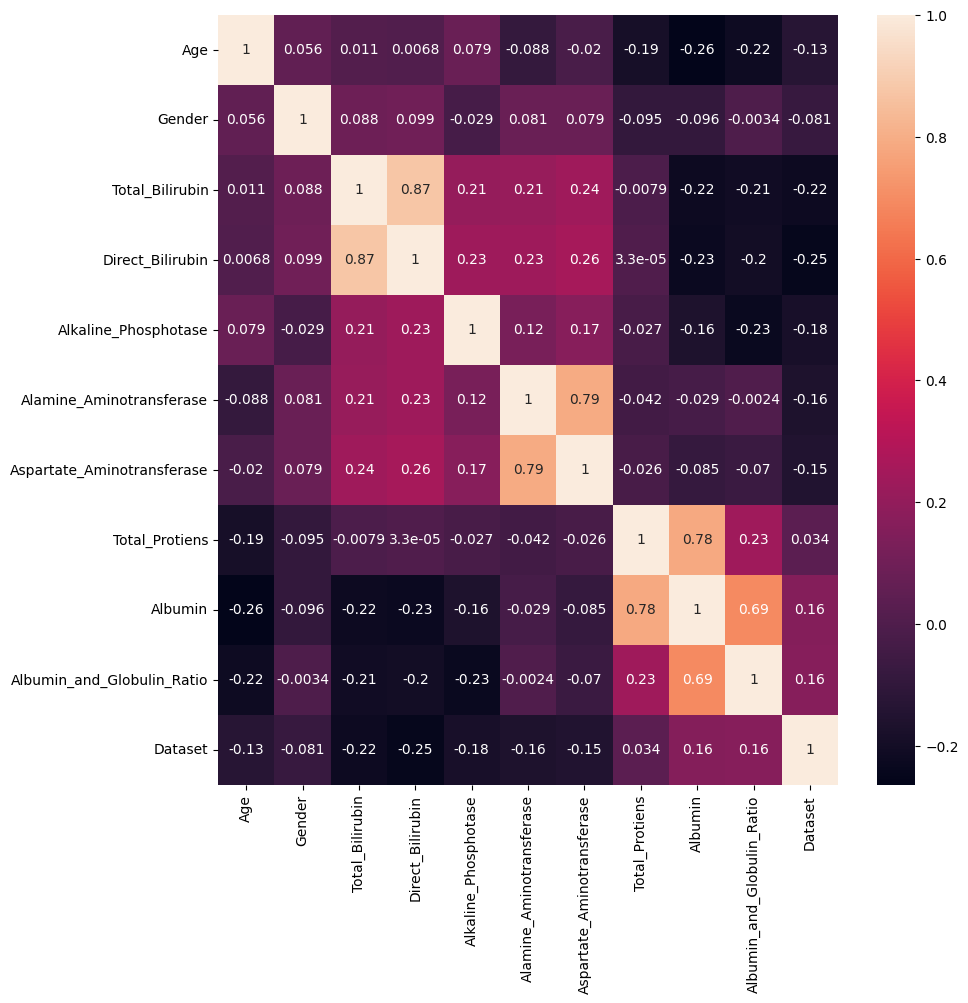

In [22]:
# yaaa lets try removing some features

# first lets see which features are corralated
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [23]:
# lets remove everything except albumin and albumin and globulin ratio, also lets keep age just in case
X = df[["Albumin", "Albumin_and_Globulin_Ratio", "Age", "Gender"]]
y = df["Dataset"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# re build the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        73
           1       0.54      0.44      0.49        43

    accuracy                           0.66       116
   macro avg       0.62      0.61      0.61       116
weighted avg       0.64      0.66      0.65       116



In [25]:
# re do hyperparameter tuning
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 11, 12, 13, 14, 15, 20],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
}
scoring = ['accuracy','f1']
# use accuracy and precision as scoring metrics
grid = GridSearchCV(dt, param_grid=params, cv=5, n_jobs=-1, scoring=scoring, refit='f1', return_train_score=True)
grid.fit(X_train, y_train)
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [26]:
# lets try the model again with the best params
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76        73
           1       0.40      0.05      0.08        43

    accuracy                           0.62       116
   macro avg       0.52      0.50      0.42       116
weighted avg       0.55      0.62      0.51       116



In [27]:
# yes I am fed uo with this model, lets try a different one
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        73
           1       0.52      0.28      0.36        43

    accuracy                           0.64       116
   macro avg       0.59      0.56      0.56       116
weighted avg       0.61      0.64      0.60       116



In [28]:
# ok lets try hyperparameter tuning on this
params = {
    "n_estimators": [100],
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 11, 12, 13],
    "min_samples_split": [2, 3, 4, 5, 6, 7],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9],
}
scoring = ['accuracy','f1']
# use accuracy and precision as scoring metrics
grid = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1, scoring=scoring, refit='f1', return_train_score=True)
grid.fit(X_train, y_train)
grid.best_params_
# check classificaion report for best params
rf = RandomForestClassifier(**grid.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.96      0.80        73
           1       0.80      0.28      0.41        43

    accuracy                           0.71       116
   macro avg       0.75      0.62      0.61       116
weighted avg       0.73      0.71      0.66       116



In [29]:
# lets try Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        73
           1       0.00      0.00      0.00        43

    accuracy                           0.63       116
   macro avg       0.31      0.50      0.39       116
weighted avg       0.40      0.63      0.49       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# class_weight

# lets try to balence the weights

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = "balanced")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70        73
           1       0.50      0.53      0.52        43

    accuracy                           0.63       116
   macro avg       0.61      0.61      0.61       116
weighted avg       0.63      0.63      0.63       116



In [31]:
# now lets use the balenced weight and the hyper parameters that we just found out with gridserch cv

lr = RandomForestClassifier(class_weight = "balanced", **grid.best_params_)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        73
           1       0.61      0.33      0.42        43

    accuracy                           0.67       116
   macro avg       0.65      0.60      0.60       116
weighted avg       0.66      0.67      0.64       116



In [32]:
# lets try a final model that is the best at binary classification
# install xgboost
%pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        73
           1       0.50      0.35      0.41        43

    accuracy                           0.63       116
   macro avg       0.59      0.57      0.57       116
weighted avg       0.61      0.63      0.61       116



In [33]:
# now lets try hyperparameter tuning for xgboost
params = {
    "n_estimators": [100],
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "min_child_weight": [1, 2, 3, 4],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "subsample": [0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "scale_pos_weight": [1, 2, 3, 4, 5, 6, 7, 8],
}
scoring = ['accuracy','f1']
# use accuracy and precision as scoring metrics
grid = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1, scoring=scoring, refit='f1', return_train_score=True)
grid.fit(X_train, y_train)
grid.best_params_
# check classificaion report for best params
xgb = XGBClassifier(**grid.best_params_)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.37      0.50        73
           1       0.42      0.79      0.55        43

    accuracy                           0.53       116
   macro avg       0.59      0.58      0.52       116
weighted avg       0.63      0.53      0.52       116

